In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [86]:
ns = 1000
c = 0.01
smin = 0.01
S = smin*(1+c)**np.arange(0,ns)

In [87]:
dn = 1
ln1pc = np.log(1+c)
deltfrac = 0.1
t_fact = 20
dt = deltfrac * 1/S[-1]
tmax = t_fact * 1/S[-1]
T = np.arange(0,tmax,dt)

In [88]:
nPchecks = 20
Pchecktime = tmax*np.arange(0,nPchecks)/(nPchecks)

In [98]:
def getnewFPDEn(OldF, dt, revtime, ns):
    if revtime:
        dt = -dt
    
    partial = np.zeros(ns)
    rhs = np.zeros(ns)
    
    partial[1:] = np.diff(OldF)
    rhs[1:] = S[1:] * (OldF[1:]*ln1pc*dn + partial[1:])
    
    rhs = rhs*(-dt)
    newF = np.zeros(ns)
    newF[0] = 1
    for i in np.arange(1,ns):
        newF[i] = rhs[i] +  newF[i-1] +  (OldF[i] - OldF[i-1])
    return newF

In [105]:
def runevolve():
    F = np.full(ns, 1)
    P = np.exp(-tmax*S)
    OldF = F
    OldP = P
    chk_idx = 0
    
    Pcheck = []
    Fcheck = []
    for t in T:
        if (chk_idx<nPchecks) and (t >= Pchecktime[chk_idx]) :
            print(f"Saving P & F at time {t}")
            Pcheck.append(OldP) 
            Fcheck.append(OldF)
            chk_idx +=1
        F = getnewFPDEn(OldF, dt, revtime=False, ns=ns)
        P = getnewFPDEn(OldF, dt, revtime=True, ns=ns)
        OldF = F
        OldP = P
    return (F,P,Fcheck,Pcheck)

In [106]:
(F,P,Fcheck,Pcheck) = runevolve()

Saving P & F at time 0.0
Saving P & F at time 0.004818896416694335
Saving P & F at time 0.00963779283338867
Saving P & F at time 0.014456689250083003
Saving P & F at time 0.01927558566677734
Saving P & F at time 0.024094482083471674
Saving P & F at time 0.028913378500166006
Saving P & F at time 0.033732274916860344
Saving P & F at time 0.03855117133355468
Saving P & F at time 0.043370067750249014
Saving P & F at time 0.04818896416694335
Saving P & F at time 0.05300786058363768
Saving P & F at time 0.05782675700033201
Saving P & F at time 0.06264565341702635
Saving P & F at time 0.06746454983372069
Saving P & F at time 0.07228344625041502
Saving P & F at time 0.07710234266710936
Saving P & F at time 0.08192123908380369
Saving P & F at time 0.08674013550049803
Saving P & F at time 0.09155903191719236


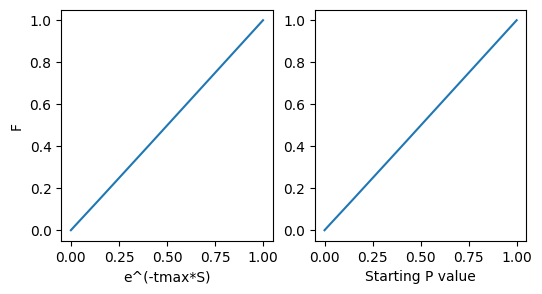

In [122]:
#Was F ok fig
fig,ax = plt.subplots(1,2, figsize=(6,3))
ax[0].plot(np.exp(-tmax*S),F)
ax[0].set_ylabel("F")
ax[0].set_xlabel("e^(-tmax*S)")
ax[1].plot(Pcheck[0],F)
ax[1].set_xlabel("Starting P value"); #which is also exp(-tmax*Svals)

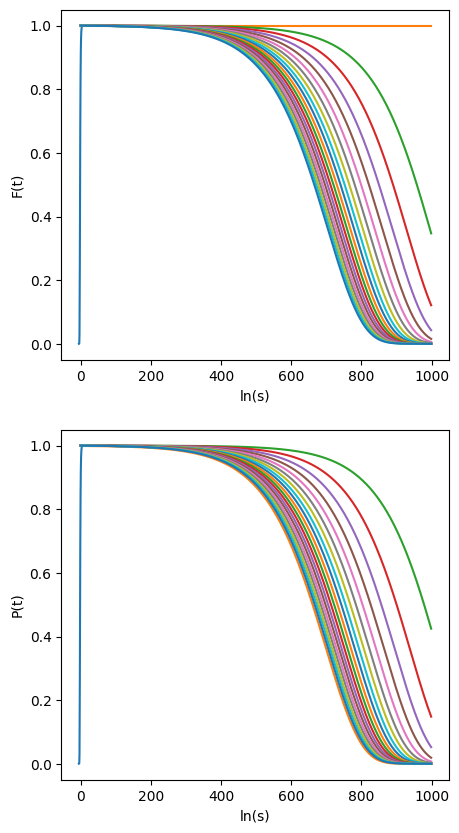

In [142]:
#evolve fig
fig,ax = plt.subplots(2,1, figsize = (5,10))
ax[0].plot(-np.log(S), F)
ax[0].set_ylabel("F(t)")
ax[0].set_xlabel("ln(s)")
for i in range(nPchecks):
    ax[0].plot(Fcheck[i])
ax[1].plot(-np.log(S), P)
ax[1].set_ylabel("P(t)")
ax[1].set_xlabel("ln(s)")
for i in range(nPchecks):
    ax[1].plot(Pcheck[i])

In [130]:
def timetravel(t0=tmax, dt = dt,
               nsteps = 10, forward=True):
    startF = np.exp(-t0 * S)
    leaveF = np.zeros([nsteps,ns])
    retrnF = np.zeros([nsteps,ns])
    
    leaveF[0] = startF
    out = not forward
    for i in np.arange(1,nsteps):
        leaveF[i] = getnewFPDEn(leaveF[i-1], dt=dt, revtime=out, ns=ns)
        
    retrnF[-1] = leaveF[-1]
    for i in np.flip(np.arange(0,nsteps-1)):
        retrnF[i] = getnewFPDEn(leaveF[i-1], dt=dt, revtime= not out, ns=ns)
    return (leaveF, retrnF)

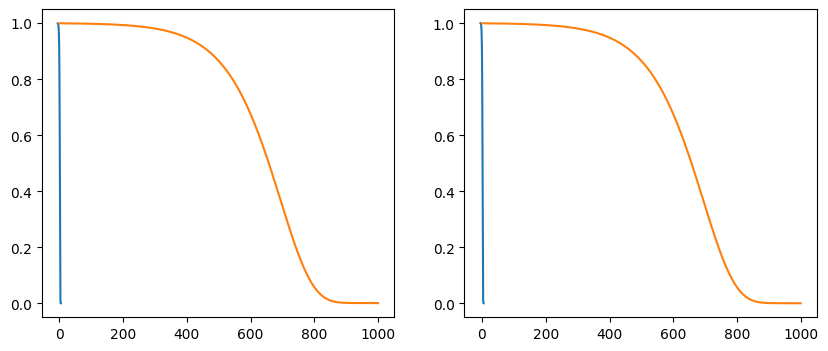

In [144]:
test = timetravel()
fig,ax = plt.subplots(1,2, figsize=(10,4))
nsteps = len(test[0][:,0])
ax[0].plot(np.log(S), test[0][0])
ax[0].plot(test[0][-1])
ax[1].plot(np.log(S), test[1][0])
ax[1].plot(test[1][-1])